In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [238]:
T = 140
POPULATION = 10000000

k_active = 14
k_passive = 4

beta = 0.1
permeability = 0.1

sigma = 4
xi = 0.1
mu = 1/4.2
nu = 1/5.2
IFR = 0.01

p = np.where(np.arange(0, T) < 50, 1, 0.1)


In [239]:
daily_dead = np.zeros(T)
daily_S = np.zeros(T)
daily_I = np.zeros(T)
daily_S_h = np.zeros(T)

I = 1
S_h = 0
E = 0
S = POPULATION - I
S_TOTAL = S
Pd = 0
D = 0
R = 0
for t in range(0,T):
    rho = I/POPULATION
    Pactivo = 1 - (1 - beta * rho)**k_active
    Pconfinado = 1 - (1 - beta * rho)**k_passive
    sh = (1 - rho)**(sigma - 1)

    Pcontagio = p[t] * Pactivo + (1-p[t])*(1 - sh * (1 - permeability) ) * Pconfinado
    S_TOTAL = POPULATION - I - E - Pd - D - R

    S_h = S_TOTAL * (1 - p[t]) * sh * (1 - permeability)
    D = xi * Pd + D
    Pd = mu * IFR * I + (1 - xi)*Pd
    R = mu * (1 - IFR) * I + R
    I = nu * E + (1 - mu) * I
    E = (S_TOTAL) * Pcontagio + (1 - nu) * E

    daily_dead[t] = xi * Pd
    daily_I[t] = I
    daily_S[t] = S_TOTAL
    daily_S_h[t] = S_h



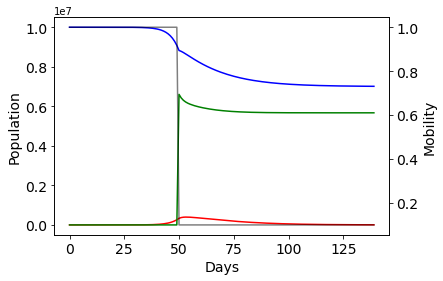

In [245]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(p, color='black', alpha=0.5, label='Mobility')
ax.plot(daily_I, color='red', label='Infected')
ax.plot(daily_S, color='blue', label='Susceptible')
ax.plot(daily_S_h, color='green', label='Susceptible (home)')

ax.set_xlabel('Days', fontsize=14)
ax.set_ylabel('Population', fontsize=14)
ax2.set_ylabel('Mobility', fontsize=14)

# ax.legend(fontsize=14, loc='lower right')

ax.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

fig.savefig('figures/example.png', dpi=300, bbox_inches='tight')